<a href="https://colab.research.google.com/github/Maicken052/MACC/blob/main/Clustering_para_L%C3%ADnea_Telef%C3%B3nica_Claro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Clustering para Línea Telefónica Claro***
## Aprendizaje automático de máquina - Universidad del Rosario
### Samuel Fernando De Dios Pérez <br> Robert Daniel Fonseca Lesmez <br> Escuela de Ingeniería, Ciencia y Tecnología



## **Librerias**

In [ ]:
pip install scikit-learn-extra

In [ ]:
import pandas as pd #para manipular y analizar datos
import numpy as np #para operaciones matematicas y estadisticas con los datos
import seaborn as sns #para visualizacion de datos (graficos)
import matplotlib.pyplot as plt #para visualizacion de datos (graficos)

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid
from sklearn.metrics import pairwise_distances, silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## **Importar el dataset**

In [ ]:
data = pd.read_excel('/content/1_TelefonosLineasClaro.xlsx')#, sheet_name=1)

## **Preprocesamiento de los datos**

In [ ]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   TIPO CLIENTE                        248 non-null    object
 1   TELEFONO                            248 non-null    object
 2   RECARGAS MENSUALES APROXIMADAS      248 non-null    int64 
 3   DEPARTAMENTO                        248 non-null    object
 4   USO DE LINEA                        248 non-null    object
 5   EDAD                                248 non-null    int64 
 6   ESTRATO                             248 non-null    int64 
 7   GENERO                              248 non-null    object
 8   NIVEL DE SATISFACCION SERVICIO      248 non-null    int64 
 9   NPS                                 248 non-null    object
 10  CONFIABILIDAD                       248 non-null    int64 
 11  RELACION COSTO BENEFICIO            248 non-null    int64 

In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

TIPO CLIENTE                          0
TELEFONO                              0
RECARGAS MENSUALES APROXIMADAS        0
DEPARTAMENTO                          0
USO DE LINEA                          0
EDAD                                  0
ESTRATO                               0
GENERO                                0
NIVEL DE SATISFACCION SERVICIO        0
NPS                                   0
CONFIABILIDAD                         0
RELACION COSTO BENEFICIO              0
SATISFACCION LLAMADAS                 0
USO DE RECARGAS                       0
SATISFACCION FACILIDAD DE RECARGAS    0
USO DE CANALES DIGITALES              0
OCUPACION                             0
dtype: int64 



In [ ]:
#Tipos de datos
categorical_data = data.select_dtypes(include=object)
print(categorical_data.columns)
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.columns)

Index(['TIPO CLIENTE', 'TELEFONO', 'DEPARTAMENTO', 'USO DE LINEA', 'GENERO',
       'NPS', 'USO DE RECARGAS', 'USO DE CANALES DIGITALES', 'OCUPACION'],
      dtype='object')
Index(['RECARGAS MENSUALES APROXIMADAS', 'EDAD', 'ESTRATO',
       'NIVEL DE SATISFACCION SERVICIO', 'CONFIABILIDAD',
       'RELACION COSTO BENEFICIO', 'SATISFACCION LLAMADAS',
       'SATISFACCION FACILIDAD DE RECARGAS'],
      dtype='object')


In [ ]:
data_num = data.drop(['TELEFONO', 'TIPO CLIENTE', 'DEPARTAMENTO', 'USO DE LINEA', 'ESTRATO', 'GENERO', 'NPS', 'USO DE RECARGAS', 'USO DE CANALES DIGITALES', 'OCUPACION'], axis=1)

In [ ]:
data_num.shape

(248, 7)

## **Clustering**

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
df_1_scaled = scaler.fit_transform(data_num)

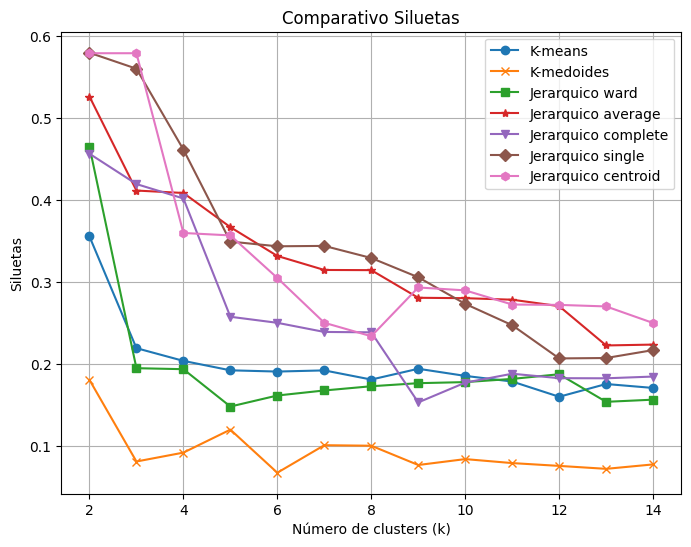

In [ ]:
#Comparación de Siluetas
range_n_clusters = range(2, 15)
valores_medios_silhouette_Jerarquico_ward = []
valores_medios_silhouette_Jerarquico_average = []
valores_medios_silhouette_Jerarquico_complete = []
valores_medios_silhouette_Jerarquico_single = []
valores_medios_silhouette_Jerarquico_centroid = []
valores_medios_silhouette_Kmedoides = []
valores_medios_silhouette_Kmeans = []

#ward
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico_ward.append(silhouette_avg)

#average
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'average',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico_average.append(silhouette_avg)

# complete
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'complete',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico_complete.append(silhouette_avg)

#single
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'single',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico_single.append(silhouette_avg)

#centroid
for n_clusters in range_n_clusters:
    Z = linkage(df_1_scaled, 'centroid')
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico_centroid.append(silhouette_avg)

#Kmeans
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Kmeans.append(silhouette_avg)

#Kmedoides
for k in range_n_clusters:
    kmedoids = KMedoids(n_clusters=k,
                        random_state=42)
    cluster_labels = kmedoids.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Kmedoides.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), valores_medios_silhouette_Kmeans, marker='o', label='K-means')
plt.plot(range(2, 15), valores_medios_silhouette_Kmedoides, marker='x', label='K-medoides')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico_ward, marker='s', label='Jerarquico ward')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico_average, marker='*', label='Jerarquico average')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico_complete, marker='v', label='Jerarquico complete')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico_single, marker='D', label='Jerarquico single')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico_centroid, marker='h', label='Jerarquico centroid')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Siluetas')
plt.title('Comparativo Siluetas')
plt.legend()
plt.grid()
plt.show()

Al comparar los valores del índice de silueta para tres clusters, el método jerárquico `centroid` presenta el valor más alto, seguido por los métodos `single` y `complete`.

Sin embargo, al elegir un método basado únicamente en el índice de silueta, surgen problemas en la clasificación. Aunque la separación de los clusters es un criterio deseable, no es suficiente para decidir si un método es adecuado.

En estos casos, se observa que la clasificación resultante agrupa 246 datos en el primer cluster y solo 1 en el segundo y tercero. Esto representa un problema significativo, ya que no se considera la varianza dentro de cada grupo.

In [ ]:
## Funcion para crear en dendrograma a partir de las distancias y la iteración e ingreso de nodos hijos/terminales a un nuevo grupo (o no)
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters = None
                     )
modelo_hclust_ward.fit(X=df_1_scaled)

modelo_hclust_single = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'single',
                            distance_threshold = 0,
                            n_clusters = None
                     )
modelo_hclust_single.fit(X=df_1_scaled)


AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        linkage='single', n_clusters=None)

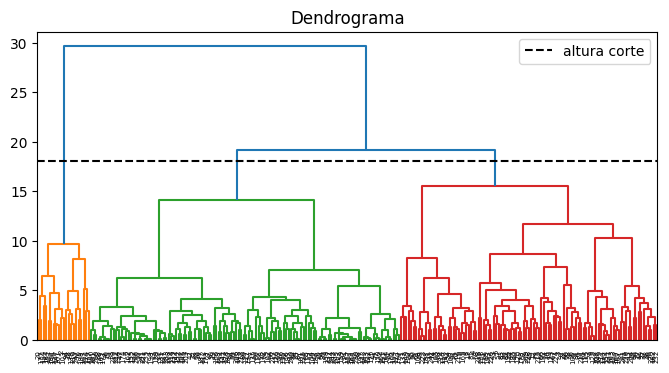

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 18
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Dendrograma")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

En el dendrograma se aprecia que los clusters forman una gran parte de cada uno de los registros en una buena proporción. Por consiguiente, se puede asegurar una buena representación dentro de cada uno de ellos.

In [ ]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 3
                     )
modelo_hclust_ward.fit(X=df_1_scaled)

modelo_hclust_single = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'single',
                            n_clusters = 3
                     )
modelo_hclust_single.fit(X=df_1_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [ ]:
y_predict = modelo_hclust_ward.fit_predict(X=df_1_scaled)
y_predict_2 = modelo_hclust_single.fit_predict(X=df_1_scaled)
print(y_predict)
print(y_predict_2)

[0 2 1 0 0 0 2 2 0 0 0 0 0 0 2 0 2 0 1 2 1 0 0 2 0 2 2 2 2 2 2 0 2 2 2 0 0
 0 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 0 2 0
 0 2 1 2 0 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 1 0 2 2 2 0 0 2 2 1 2 0 0 1 0 2 0
 0 2 2 2 0 0 2 2 2 0 2 2 0 1 0 2 2 2 2 0 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 0 1
 2 0 2 1 2 0 0 2 2 2 2 2 0 1 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 1 0 1 2 2 0 2 1
 0 2 2 0 2 1 2 0 0 2 0 1 2 1 2 2 0 2 0 0 2 2 2 2 0 1 0 0 2 0 0 0 2 0 2 0 2
 2 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Obtener los elementos únicos y sus conteos
unique_elements, counts = np.unique(y_predict, return_counts=True)
unique_elements, counts_2 = np.unique(y_predict_2, return_counts=True)

# Mostrar los resultados
print("ELementos en cada cluster (ward):", counts)
print("ELementos en cada cluster (single):", counts_2)

ELementos en cada cluster (ward): [103  21 124]
ELementos en cada cluster (single): [245   1   2]


Podemos observar que este modelo tiene 3 clusters mejor distribuidos. Para evaluar la calidad del clustering, es necesario considerar tanto la varianza dentro de los clusters como la separación entre ellos. Para ello, utilizaremos el índice de Calinski-Harabasz (`calinski_harabasz_score`), que tiene en cuenta ambas métricas.

$CH=\frac{\frac{SSB}{k-1}}{\frac{SSW}{n-k}}$

donde:

*   $SSB$ es la suma de los cuadrados entre los clusters.
*   $SSW$ es la suma de los cuadrados dentro de los clusters.
*   $k$ es el número de clusters.
*   $n$ es el número total de puntos de datos.

Este índice se interpreta de la siguiente manera: cuanto mayor sea el valor del índice, mejor será el modelo de clustering.

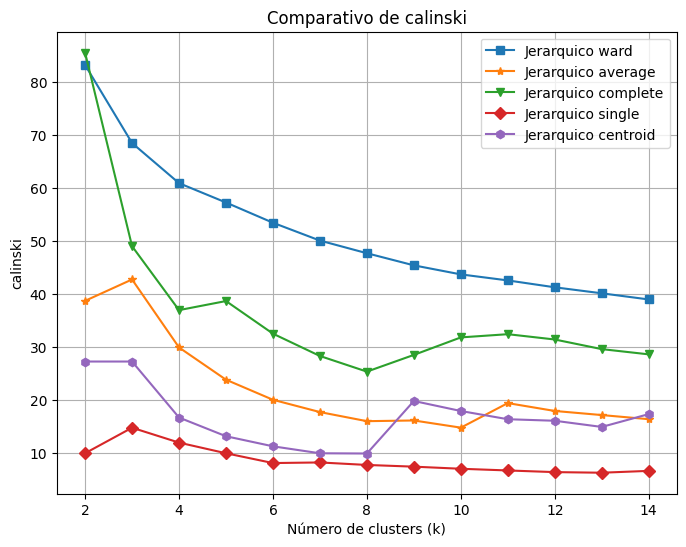

In [ ]:
#Comparación de calinski_harabasz
range_n_clusters = range(2, 15)
valores_medios_calinski_Jerarquico_ward = []
valores_medios_calinski_Jerarquico_average = []
valores_medios_calinski_Jerarquico_complete = []
valores_medios_calinski_Jerarquico_single = []
valores_medios_calinski_Jerarquico_centroid = []

#ward
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    calinski_avg = calinski_harabasz_score(df_1_scaled, cluster_labels)
    valores_medios_calinski_Jerarquico_ward.append(calinski_avg)

#average
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'average',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    calinski_avg = calinski_harabasz_score(df_1_scaled, cluster_labels)
    valores_medios_calinski_Jerarquico_average.append(calinski_avg)

# complete
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'complete',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    calinski_avg = calinski_harabasz_score(df_1_scaled, cluster_labels)
    valores_medios_calinski_Jerarquico_complete.append(calinski_avg)

#single
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'single',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    calinski_avg = calinski_harabasz_score(df_1_scaled, cluster_labels)
    valores_medios_calinski_Jerarquico_single.append(calinski_avg)

#centroid
for n_clusters in range_n_clusters:
    Z = linkage(df_1_scaled, 'centroid')
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    calinski_avg = calinski_harabasz_score(df_1_scaled, cluster_labels)
    valores_medios_calinski_Jerarquico_centroid.append(calinski_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), valores_medios_calinski_Jerarquico_ward, marker='s', label='Jerarquico ward')
plt.plot(range(2, 15), valores_medios_calinski_Jerarquico_average, marker='*', label='Jerarquico average')
plt.plot(range(2, 15), valores_medios_calinski_Jerarquico_complete, marker='v', label='Jerarquico complete')
plt.plot(range(2, 15), valores_medios_calinski_Jerarquico_single, marker='D', label='Jerarquico single')
plt.plot(range(2, 15), valores_medios_calinski_Jerarquico_centroid, marker='h', label='Jerarquico centroid')
plt.xlabel('Número de clusters (k)')
plt.ylabel('calinski')
plt.title('Comparativo de calinski')
plt.legend()
plt.grid()
plt.show()

Como podemos ver, en este índice el mejor modelo jerárquico es ward.

Otra métrica que se usa es Davies–Bouldin, el cual tiene en cuenta las dos características más importantes para los cluster, con la fórmula.

$DB=\frac{1}{k}\sum_{i=0}^{k}{\max_{i\neq j}\left(\frac{s_{i}+s_{j}}{d_{ij}}\right)}$

Donde:

*   $s_{i}$ es la dispersión del cluster $i$
*   $d_{ij}$ es la distancia entre los centroides de los clusters $i$ y $j$.
*   $k$ es el número de clusters.

Al contrario de la métrica anterior, entre más pequeño es el valor, mejor es el rendimiento del modelo.

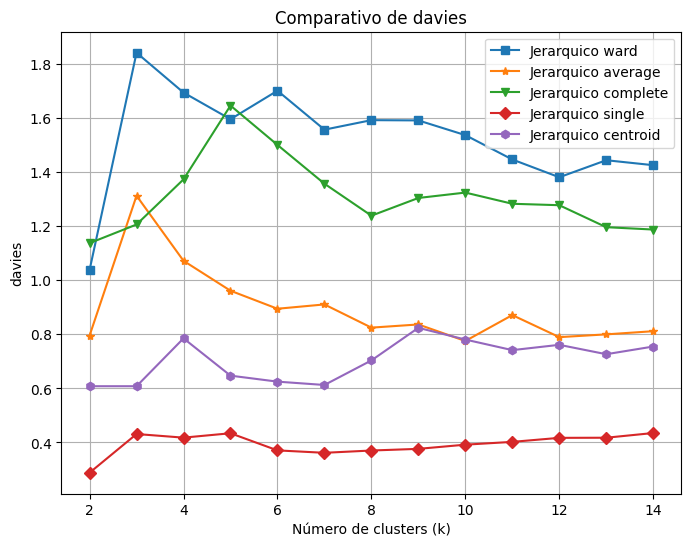

In [ ]:
#Comparación de davies_bouldin
range_n_clusters = range(2, 15)
valores_medios_davies_Jerarquico_ward = []
valores_medios_davies_Jerarquico_average = []
valores_medios_davies_Jerarquico_complete = []
valores_medios_davies_Jerarquico_single = []
valores_medios_davies_Jerarquico_centroid = []

#ward
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    davies_avg = davies_bouldin_score(df_1_scaled, cluster_labels)
    valores_medios_davies_Jerarquico_ward.append(davies_avg)

#average
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'average',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    davies_avg = davies_bouldin_score(df_1_scaled, cluster_labels)
    valores_medios_davies_Jerarquico_average.append(davies_avg)

# complete
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'complete',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    davies_avg = davies_bouldin_score(df_1_scaled, cluster_labels)
    valores_medios_davies_Jerarquico_complete.append(davies_avg)

#single
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'single',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    davies_avg = davies_bouldin_score(df_1_scaled, cluster_labels)
    valores_medios_davies_Jerarquico_single.append(davies_avg)

#centroid
for n_clusters in range_n_clusters:
    Z = linkage(df_1_scaled, 'centroid')
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    davies_avg = davies_bouldin_score(df_1_scaled, cluster_labels)
    valores_medios_davies_Jerarquico_centroid.append(davies_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), valores_medios_davies_Jerarquico_ward, marker='s', label='Jerarquico ward')
plt.plot(range(2, 15), valores_medios_davies_Jerarquico_average, marker='*', label='Jerarquico average')
plt.plot(range(2, 15), valores_medios_davies_Jerarquico_complete, marker='v', label='Jerarquico complete')
plt.plot(range(2, 15), valores_medios_davies_Jerarquico_single, marker='D', label='Jerarquico single')
plt.plot(range(2, 15), valores_medios_davies_Jerarquico_centroid, marker='h', label='Jerarquico centroid')
plt.xlabel('Número de clusters (k)')
plt.ylabel('davies')
plt.title('Comparativo de davies')
plt.legend()
plt.grid()
plt.show()

En este índice se ve que el ward es el peor de todos (entre  más bajo, mejor), pero como los otros 4 modelos dejan un solo cluster con todos los datos, se dejará el ward como modelo definitivo.

In [ ]:
ResultKmeans = pd.DataFrame(y_predict)
ResultKmeans.rename(columns={0:"Cluster"},inplace=True)
ResultKmeans.nunique()

Cluster    3
dtype: int64

In [ ]:
df_all = pd.concat([data,ResultKmeans],axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   TIPO CLIENTE                        248 non-null    object
 1   TELEFONO                            248 non-null    object
 2   RECARGAS MENSUALES APROXIMADAS      248 non-null    int64 
 3   DEPARTAMENTO                        248 non-null    object
 4   USO DE LINEA                        248 non-null    object
 5   EDAD                                248 non-null    int64 
 6   ESTRATO                             248 non-null    int64 
 7   GENERO                              248 non-null    object
 8   NIVEL DE SATISFACCION SERVICIO      248 non-null    int64 
 9   NPS                                 248 non-null    object
 10  CONFIABILIDAD                       248 non-null    int64 
 11  RELACION COSTO BENEFICIO            248 non-null    int64 

### **Resultados cuantitativos**

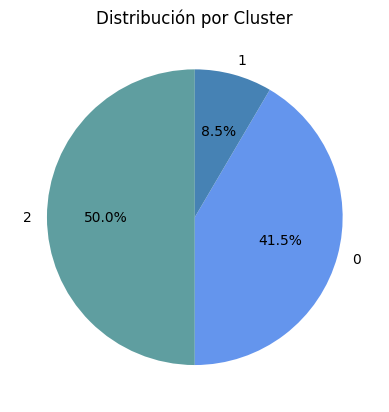

In [ ]:
element_counts = df_all["Cluster"].value_counts()

# Gráfico circular
plt.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90, colors=['#5F9EA0', '#6495ED', '#4682B4', '#4169E1', '#1E90FF'])
plt.title("Distribución por Cluster")

# Mostrar la figura con ambos gráficos
plt.show()

El cluster que mayor cantidad tiene es el 2, con un 50% del total de clientes, seguido del 0 con un 41% y el 1 con un 8.5%

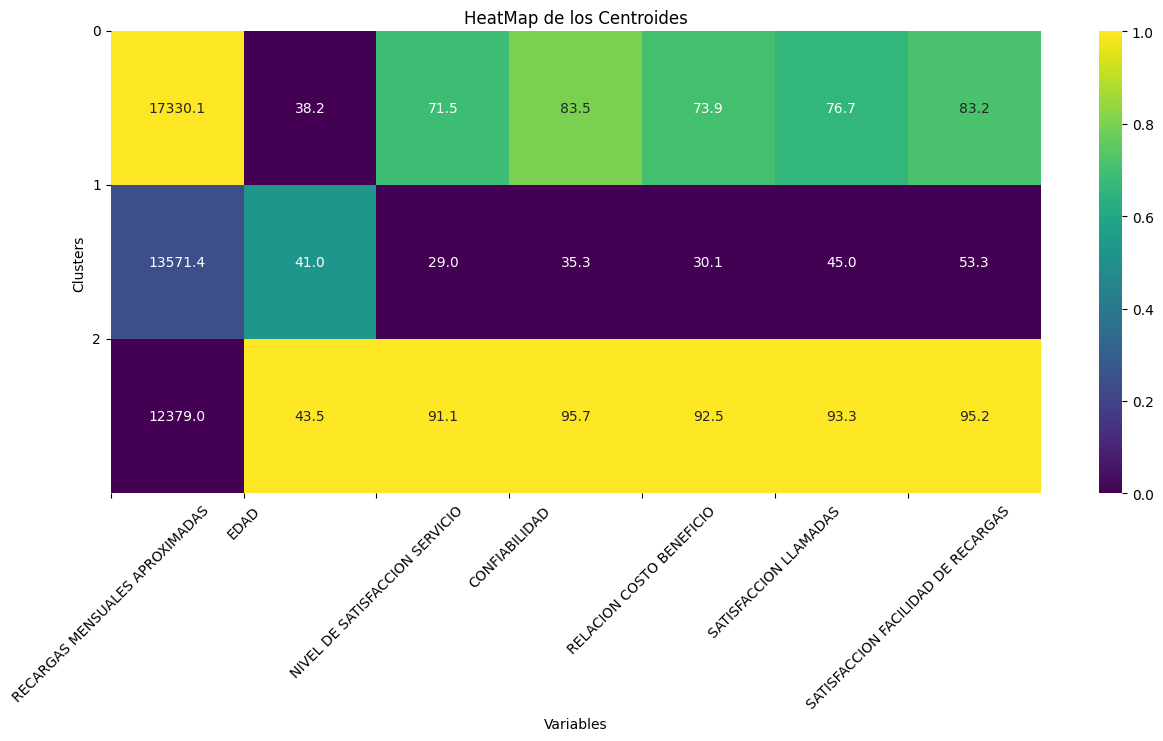

In [ ]:
# Calcular los promedios originales
Centroides = df_all.groupby("Cluster")
columns = data_num.columns.tolist()
averages = Centroides[columns].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(15, 6))
sns.heatmap(averages_scaled, annot=averages, cmap="viridis", fmt=".1f")

# Personalizar las etiquetas de los ejes
feature_names = columns
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)

# Personalizar el gráfico (opcional)
plt.title("HeatMap de los Centroides")
plt.xlabel("Variables")
plt.ylabel("Clusters")

# Mostrar el gráfico
plt.show()

*   El **cluster 0** presenta un nivel de satisfacción superior a 71, una confiabilidad del 83% y está compuesto de personas en promedio jóvenes, quienes realizan la mayor cantidad de recargas mensuales.
*   El **cluster 1** muestra en promedio el nivel más bajo de satisfacción de todas las variables, baja confiabilidad y una relación costo-beneficio desfavorable. Además, las personas en este grupo tienen una edad promedio de 41 años y realizan recargas mensuales de nivel medio.
*   El **cluster 2** a diferencia del cluster 1, destaca por tener un nivel de satisfacción muy alto en todas las variables. Las personas en este grupo están satisfechas con su servicio y confían en el. En promedio, este cluster agrupa a personas de alrededor de 43 años que realizan recargas mensuales muy bajas, cercanas a 12,000.

Se puede hacer un resumen y decir que los cluster son:


*   Cluster 0: Promedio (normal, aceptable)
*   Cluster 1: Malo
*   Cluster 2: Bueno





### **Resultados cualitativos**

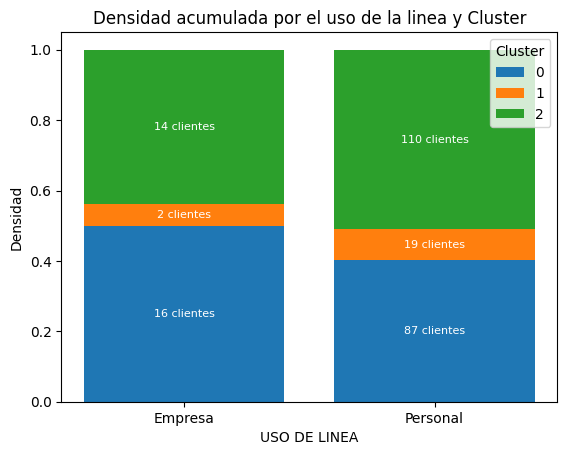

In [ ]:
df_all['Count'] = 1
pivot_df = df_all.pivot_table(index='USO DE LINEA', columns='Cluster', values='Count', aggfunc='sum', fill_value=0)
densities = pivot_df.div(pivot_df.sum(axis=1), axis=0)


fig, ax = plt.subplots()
x = np.arange(len(densities.index))

densidades_acumuladas = np.zeros(len(densities.index))

for cluster in densities.columns:
    densidad = densities[cluster].values
    cantidad = pivot_df[cluster].values
    bars = ax.bar(x, densidad, label=cluster, bottom=densidades_acumuladas)
    densidades_acumuladas += densidad

    for bar, count in zip(bars, cantidad):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{count} clientes', ha='center', va='center', fontsize=8, color='white')

ax.set_xlabel('USO DE LINEA')
ax.set_ylabel('Densidad')
ax.set_title('Densidad acumulada por el uso de la linea y Cluster')
ax.set_xticks(x)
ax.set_xticklabels(densities.index)
ax.legend(title='Cluster')

plt.show()

Se observa como las personas con tipo de línea personal, tiene un servicio de telefonía promedio y bueno, a su vez hay una pequeña parte que muestra la tenencia de un mal servicio.

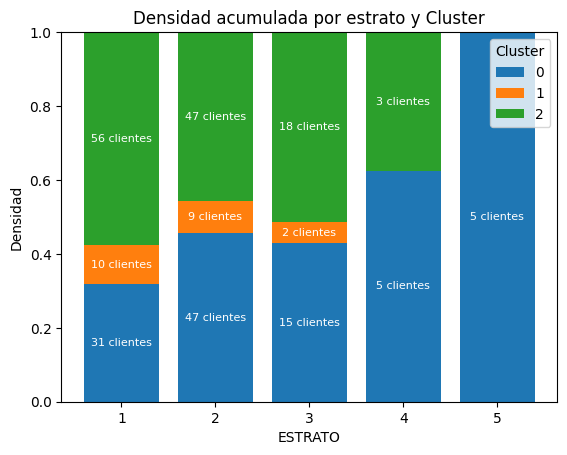

In [ ]:
df_all['Count'] = 1
pivot_df = df_all.pivot_table(index='ESTRATO', columns='Cluster', values='Count', aggfunc='sum', fill_value=0)
densities = pivot_df.div(pivot_df.sum(axis=1), axis=0)


fig, ax = plt.subplots()
x = np.arange(len(densities.index))

densidades_acumuladas = np.zeros(len(densities.index))

for cluster in densities.columns:
    densidad = densities[cluster].values
    cantidad = pivot_df[cluster].values
    bars = ax.bar(x, densidad, label=cluster, bottom=densidades_acumuladas)
    densidades_acumuladas += densidad

    for bar, count in zip(bars, cantidad):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{count} clientes', ha='center', va='center', fontsize=8, color='white')

ax.set_xlabel('ESTRATO')
ax.set_ylabel('Densidad')
ax.set_title('Densidad acumulada por estrato y Cluster')
ax.set_xticks(x)
ax.set_xticklabels(densities.index)
ax.legend(title='Cluster')

plt.show()

se ve como:

El **cluster 0** presenta mayoria de los estratos 1, 2 y 3 (tambien la mayor parte de 4 y 5, pero al ser tan pocos datos, estos no son significativos), por lo que la mayoría de las clientes dicen que tienen un servicio promedio.

El **cluster 1** muestra una pequeña porcion de los estratos 1, 2 y 3. Por lo cual pocas personas de estos estratos clasifican el servicio como malo.

El **cluster 2** contiene una gran cantidad de clientes en los estratos 1, 2 y 3. es decir, la mayoria de las personas consideran que tienen un servicio bueno de telefonía.


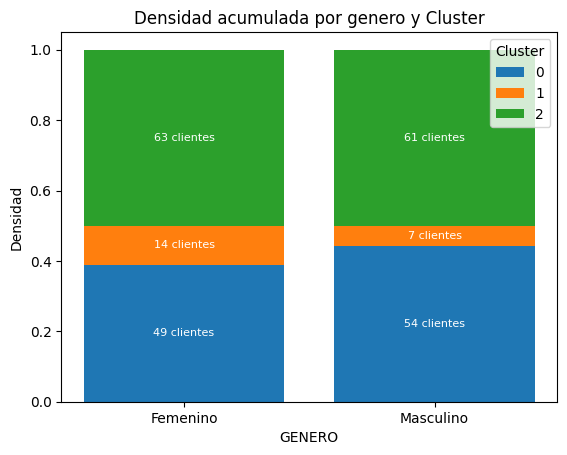

In [ ]:
df_all['Count'] = 1
pivot_df = df_all.pivot_table(index='GENERO', columns='Cluster', values='Count', aggfunc='sum', fill_value=0)
densities = pivot_df.div(pivot_df.sum(axis=1), axis=0)


fig, ax = plt.subplots()
x = np.arange(len(densities.index))

densidades_acumuladas = np.zeros(len(densities.index))

for cluster in densities.columns:
    densidad = densities[cluster].values
    cantidad = pivot_df[cluster].values
    bars = ax.bar(x, densidad, label=cluster, bottom=densidades_acumuladas)
    densidades_acumuladas += densidad

    for bar, count in zip(bars, cantidad):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{count} clientes', ha='center', va='center', fontsize=8, color='white')

ax.set_xlabel('GENERO')
ax.set_ylabel('Densidad')
ax.set_title('Densidad acumulada por genero y Cluster')
ax.set_xticks(x)
ax.set_xticklabels(densities.index)
ax.legend(title='Cluster')

plt.show()

Se puede ver como los clusters tienen una cantidad muy parecida de datos **femeninos** y **masculinos**, por lo que se entiende que no hay relación entre el genero y la calidad del servicio.

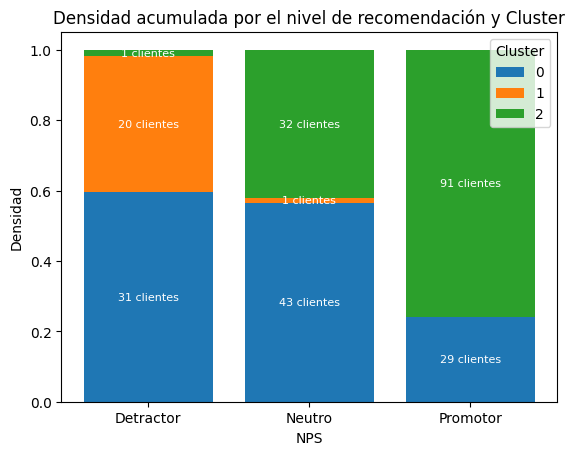

In [ ]:
df_all['Count'] = 1
pivot_df = df_all.pivot_table(index='NPS', columns='Cluster', values='Count', aggfunc='sum', fill_value=0)
densities = pivot_df.div(pivot_df.sum(axis=1), axis=0)


fig, ax = plt.subplots()
x = np.arange(len(densities.index))

densidades_acumuladas = np.zeros(len(densities.index))

for cluster in densities.columns:
    densidad = densities[cluster].values
    cantidad = pivot_df[cluster].values
    bars = ax.bar(x, densidad, label=cluster, bottom=densidades_acumuladas)
    densidades_acumuladas += densidad

    for bar, count in zip(bars, cantidad):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{count} clientes', ha='center', va='center', fontsize=8, color='white')

ax.set_xlabel('NPS')
ax.set_ylabel('Densidad')
ax.set_title('Densidad acumulada por el nivel de recomendación y Cluster')
ax.set_xticks(x)
ax.set_xticklabels(densities.index)
ax.legend(title='Cluster')

plt.show()

La mayoría de las personas neutrales se encuentran distribuidas en los clusters 0 y 2. Aunque estas personas reciben un servicio de calidad aceptable o bueno, optan por mantener una postura neutral en cuanto a recomendar o criticar el servicio.

El cluster 2 alberga la mayoría de los promotores, lo cual es comprensible ya que consideran que el servicio es satisfactorio en general y confían en él. Por otro lado, los detractores están representados por aquellos que tienen un servicio promedio o deficiente, reflejado en todas sus métricas de satisfacción.

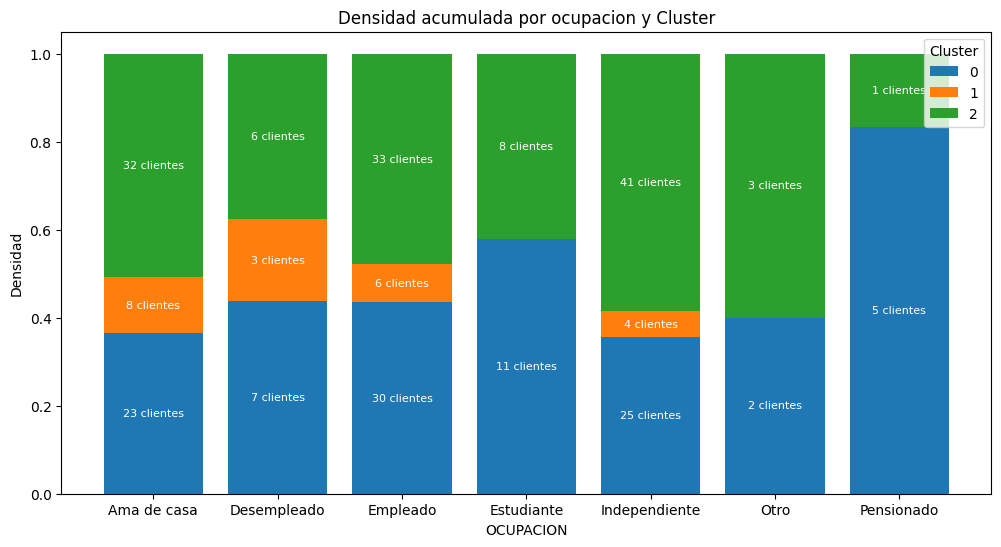

In [ ]:
df_all['Count'] = 1
pivot_df = df_all.pivot_table(index='OCUPACION', columns='Cluster', values='Count', aggfunc='sum', fill_value=0)
densities = pivot_df.div(pivot_df.sum(axis=1), axis=0)


fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(densities.index))

densidades_acumuladas = np.zeros(len(densities.index))

for cluster in densities.columns:
    densidad = densities[cluster].values
    cantidad = pivot_df[cluster].values
    bars = ax.bar(x, densidad, label=cluster, bottom=densidades_acumuladas)
    densidades_acumuladas += densidad

    for bar, count in zip(bars, cantidad):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{count} clientes', ha='center', va='center', fontsize=8, color='white')

ax.set_xlabel('OCUPACION')
ax.set_ylabel('Densidad')
ax.set_title('Densidad acumulada por ocupacion y Cluster')
ax.set_xticks(x)
ax.set_xticklabels(densities.index)
ax.legend(title='Cluster')

plt.show()

## **Conclusiones y recomendaciones**

El método de clustering se enfoca en individuos que ofrecen un servicio adecuado, apropiado y desfavorable, considerando los niveles de satisfacción y confiabilidad. Aunque la cantidad de servicio malo es baja, no es despreciable, por lo que se debería mejorar los servicios a las líneas empresariales y enfocarse en la calidad del servicio del estrato 1. También es bueno aumentar la promoción de campañas para que las personas que tienen una buena percepción del servicio, realicen más recargas mensuales.

La edad y el género no son factores significativos, debido a la proximidad de los promedios, lo que impide la adopción de ninguna recomendación al considerar estas características de los clientes.


